In [320]:
from collections import defaultdict
import random

from tqdm.notebook import tqdm

import pandas as pd
from collections import Counter

from scipy import sparse
from scipy.sparse.linalg import svds
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

import glob
import re
import matplotlib.pyplot as plt

import math

In [321]:
books = glob.glob('english_books/*')
print(books)

['english_books\\A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens.txt', 'english_books\\A Modest Proposal by Jonathan Swift.txt', 'english_books\\A Tale of Two Cities by Charles Dickens.txt', 'english_books\\Adventures of Huckleberry Finn by Mark Twain.txt', 'english_books\\Anne of Green Gables by L. M.  Montgomery.txt', 'english_books\\Anthem by Ayn Rand.txt', 'english_books\\Dracula by Bram Stoker.txt', 'english_books\\Dubliners by James Joyce.txt', 'english_books\\Emma by Jane Austen.txt', 'english_books\\Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley.txt', 'english_books\\Great Expectations by Charles Dickens.txt', 'english_books\\Heart of Darkness by Joseph Conrad.txt', 'english_books\\Jane Eyre_ An Autobiography by Charlotte Brontë.txt', 'english_books\\Leviathan by Thomas Hobbes.txt', 'english_books\\Little Women by Louisa May Alcott.txt', 'english_books\\Metamorphosis by Franz Kafka.txt', 'english_books\\Moby Dick; Or, The 

In [322]:
book_word_d = {}
all_book = ""
for b in books:
    book = b[14:]
    if book != "The_Scarlet_Letter_by_Nathaniel_Hawthorne.txt":
    #if book == "The_Adventures_of_Sherlock_Holmes_by_Arthur_Conan_Doyle.txt" or book == "The_Scarlet_Letter_by_Nathaniel_Hawthorne.txt":    
        print(book[:-4])
        with open('english_books\\'+book,encoding="utf8") as fi:
            book_r = fi.read()
        start_b = re.search(r"\*\*\*[\w|\s]+[\;|\w]+[\w|\s]+\*\*\*",book_r)
        #print(start_b)
        end = start_b.end()
        #print(book_r)
        try_book = book_r[end:]
        end_b = re.search(r"\*\*\*[\w|\s]+[\;|\w]+[\w|\s]+\*\*\*",try_book)
        cut_off = end_b.start()
        complete_b = try_book[:cut_off]
        #text_soup = text_soup.replace('•', ' ')
        c_book = complete_b.replace('\n', ' ')
        book_name = book[:-4]
        book_word_d[book_name] = c_book
        all_book = all_book + c_book

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
A Modest Proposal by Jonathan Swift
A Tale of Two Cities by Charles Dickens
Adventures of Huckleberry Finn by Mark Twain
Anne of Green Gables by L. M.  Montgomery
Anthem by Ayn Rand
Dracula by Bram Stoker
Dubliners by James Joyce
Emma by Jane Austen
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Great Expectations by Charles Dickens
Heart of Darkness by Joseph Conrad
Jane Eyre_ An Autobiography by Charlotte Brontë
Leviathan by Thomas Hobbes
Little Women by Louisa May Alcott
Metamorphosis by Franz Kafka
Moby Dick; Or, The Whale by Herman Melville
Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass
Oliver Twist by Charles Dickens
Peter Pan by J. M.  Barrie
Pride and Prejudice by Jane Austen
Pygmalion by Bernard Shaw
Second Treatise of Government by John Locke
The Adventures of Sherlock Holmes by Arthur Conan Doyle
The Adventures of Tom Sawyer, Complete 

In [323]:
book_r_words = [x.lower() for x in regexp_tokenize(all_book, '\w+')]
book_r_counter = Counter(book_r_words).most_common(200)

In [324]:
len(book_r_words)

4289747

In [325]:
word_num = 1
for item in war_r_counter:
    print("rank {}: {} {}".format(word_num,item[1],item[0]))
    word_num = word_num + 1
#print(book_r_counter)

rank 1: 169 the
rank 2: 137 of
rank 3: 115 and
rank 4: 107 to
rank 5: 90 a
rank 6: 70 in
rank 7: 55 i
rank 8: 51 be
rank 9: 46 for
rank 10: 39 as
rank 11: 39 that
rank 12: 37 their
rank 13: 36 will
rank 14: 34 or
rank 15: 34 by
rank 16: 29 at
rank 17: 29 have
rank 18: 28 they
rank 19: 26 it
rank 20: 26 this
rank 21: 24 who
rank 22: 23 which
rank 23: 22 are
rank 24: 22 our
rank 25: 21 is
rank 26: 20 my
rank 27: 19 children
rank 28: 18 would
rank 29: 16 being
rank 30: 16 not
rank 31: 15 them
rank 32: 15 kingdom
rank 33: 15 one
rank 34: 15 thousand
rank 35: 14 so
rank 36: 13 from
rank 37: 13 upon
rank 38: 12 country
rank 39: 12 with
rank 40: 12 no
rank 41: 11 number
rank 42: 11 therefore
rank 43: 11 may
rank 44: 10 great
rank 45: 10 very
rank 46: 10 his
rank 47: 10 own
rank 48: 10 child
rank 49: 10 year
rank 50: 9 all
rank 51: 9 but
rank 52: 9 many
rank 53: 9 other
rank 54: 9 we
rank 55: 9 can
rank 56: 8 parents
rank 57: 8 an
rank 58: 8 well
rank 59: 8 years
rank 60: 8 most
rank 61: 8 two

In [326]:
#book_token_words = [x.lower() for x in regexp_tokenize(book_word_d[b], '\w+')]
#book_token_counter = Counter(book_token_words).most_common(100)
#for item in book_token_counter:

In [327]:
for item in book_r_counter:
    top_count = item[1]
    break

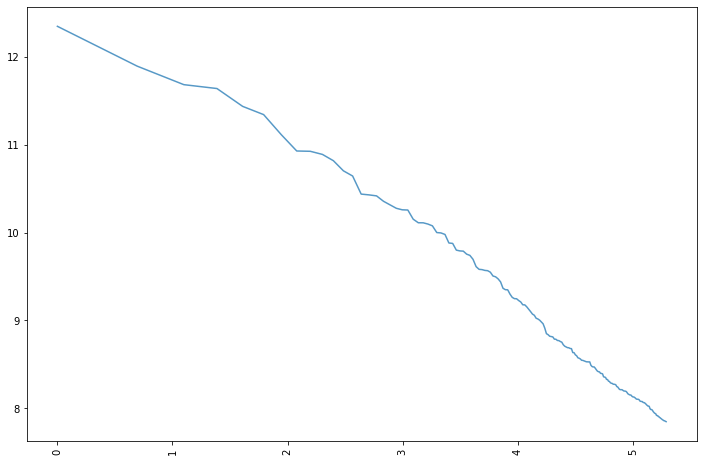

In [328]:
plt.rcParams["figure.figsize"] = [12, 8]
false_word = ['s','t','n']
ind = []
fre = []
fretwo = []
rnk = []
run = 1
for item in book_r_counter:
    if item[0] not in false_word:
        ind.append(item[0])
        fre.append(item[1])
        fretwo.append(math.log(item[1]))
        rnk.append(math.log(run))
        run = run + 1

#plt.bar(ind, fre, alpha = 1)
plt.xticks(rotation='vertical')
plt.plot(rnk, fretwo, alpha =  .75)

plt.yscale('linear')

plt.show()

In [329]:
theta = np.polyfit(rnk, fretwo, 1)

In [330]:
theta

array([-0.98611186, 13.09243213])

In [394]:
column_name_list = ['book_name']
column_name_list.extend(list((range(1, 201))))
column_name_list = list((range(1, 201)))

In [395]:
log_name_list = []
for r in column_log_list:
    log_name_list.append(math.log(r))

In [396]:
word_df = pd.DataFrame(columns=column_name_list)
word_df

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200


In [397]:
word_df.loc[0,:] = log_name_list

In [398]:
count = 0
book_index = []
for b in book_word_d:
    if count < 50:
        word_rank = 0 
        print(b)
        false_word = ['s','t','n']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_word_d[b], '\w+')]
        if len(book_token_words) > 9999:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common(230)
            max_fre = 0
            #fretwo.append(b)
            for item in book_token_counter:
                if item[0] not in false_word:
                    if word_rank < 200:
                        ind.append(item[0])
                        fre.append(item[1])
                        fretwo.append(math.log(item[1]))
                        if (item[1]*run) > max_fre:
                            max_fre = item[1]*run
                        run = run + 1
                        word_rank = word_rank + 1
            #normlized_fre = [x / max_fre for x in fretwo]
            #word_df.iloc[count+1,0] = b
            word_df.loc[count+1,:] = fretwo
            count = count + 1
        word_df

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
A Modest Proposal by Jonathan Swift
A Tale of Two Cities by Charles Dickens
Adventures of Huckleberry Finn by Mark Twain
Anne of Green Gables by L. M.  Montgomery
Anthem by Ayn Rand
Dracula by Bram Stoker
Dubliners by James Joyce
Emma by Jane Austen
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Great Expectations by Charles Dickens
Heart of Darkness by Joseph Conrad
Jane Eyre_ An Autobiography by Charlotte Brontë
Leviathan by Thomas Hobbes
Little Women by Louisa May Alcott
Metamorphosis by Franz Kafka
Moby Dick; Or, The Whale by Herman Melville
Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass
Oliver Twist by Charles Dickens
Peter Pan by J. M.  Barrie
Pride and Prejudice by Jane Austen
Pygmalion by Bernard Shaw
Second Treatise of Government by John Locke
The Adventures of Sherlock Holmes by Arthur Conan Doyle
The Adventures of Tom Sawyer, Complete 

In [399]:
book_index

['A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens',
 'A Tale of Two Cities by Charles Dickens',
 'Adventures of Huckleberry Finn by Mark Twain',
 'Anne of Green Gables by L. M.  Montgomery',
 'Anthem by Ayn Rand',
 'Dracula by Bram Stoker',
 'Dubliners by James Joyce',
 'Emma by Jane Austen',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley',
 'Great Expectations by Charles Dickens',
 'Heart of Darkness by Joseph Conrad',
 'Jane Eyre_ An Autobiography by Charlotte Brontë',
 'Leviathan by Thomas Hobbes',
 'Little Women by Louisa May Alcott',
 'Metamorphosis by Franz Kafka',
 'Moby Dick; Or, The Whale by Herman Melville',
 'Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass',
 'Oliver Twist by Charles Dickens',
 'Peter Pan by J. M.  Barrie',
 'Pride and Prejudice by Jane Austen',
 'Pygmalion by Bernard Shaw',
 'Second Treatise of Government by John Locke',
 'The Adventures of Sherlock Holmes by Arth

In [400]:
#word_df.set_index("book_name", inplace = True)
word_df

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,5.252273,5.257495,5.26269,5.267858,5.273,5.278115,5.283204,5.288267,5.293305,5.298317
1,7.36074,6.966967,6.556778,6.520621,6.49224,6.300786,6.253829,6.200509,6.056784,6.040255,...,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.944439
2,8.9938,8.516993,8.297544,8.180601,7.990577,7.864036,7.633854,7.604894,7.586804,7.567863,...,4.584967,4.584967,4.584967,4.564348,4.564348,4.543295,4.532599,4.521789,4.521789,4.521789
3,8.759826,8.499029,8.206584,8.070906,7.986845,7.844633,7.622664,7.520235,7.413367,7.30317,...,4.418841,4.406719,4.394449,4.394449,4.394449,4.382027,4.382027,4.369448,4.369448,4.343805
4,8.275122,8.130942,8.090709,8.021913,7.709308,7.649216,7.561122,7.436617,7.32449,7.299121,...,4.356709,4.343805,4.343805,4.343805,4.343805,4.330733,4.330733,4.317488,4.317488,4.304065
5,7.212294,6.826545,6.733402,6.398595,6.22059,5.988961,5.765191,5.598422,5.556828,5.493061,...,2.70805,2.70805,2.70805,2.70805,2.70805,2.70805,2.70805,2.70805,2.70805,2.70805
6,8.975883,8.683724,8.485909,8.448057,8.196712,7.990915,7.854769,7.82764,7.81843,7.683864,...,4.727388,4.718499,4.70048,4.70048,4.691348,4.682131,4.672829,4.672829,4.672829,4.663439
7,8.309185,7.711549,7.532088,7.469084,7.444833,7.36897,7.056175,7.055313,6.961296,6.698268,...,3.850148,3.850148,3.850148,3.828641,3.828641,3.828641,3.828641,3.806662,3.806662,3.806662
8,8.563695,8.556606,8.496174,8.364275,8.064951,8.04719,7.835184,7.811163,7.78239,7.757906,...,4.718499,4.70953,4.70953,4.691348,4.691348,4.682131,4.663439,4.634729,4.624973,4.624973
9,8.341649,7.998335,7.95367,7.879291,7.644441,7.482119,7.237778,7.028201,6.928538,6.925595,...,3.73767,3.688879,3.688879,3.688879,3.663562,3.663562,3.663562,3.663562,3.663562,3.663562


In [401]:
#word_df.loc[0,:] = log_name_list
#word_df

In [402]:
word_df = word_df.apply(pd.to_numeric)

In [404]:
count = 0
for row in word_df.iterrows():
    if count != 0:
        theta = np.polyfit(word_df.loc[0,:], word_df.loc[count,:], 1)
        print("{} slope of {}".format(theta[0],book_index[count-1]))
    count = count + 1

-0.9426271066721666 slope of A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
-0.9484776186649654 slope of A Tale of Two Cities by Charles Dickens
-0.9295088910531788 slope of Adventures of Huckleberry Finn by Mark Twain
-0.9232485481852148 slope of Anne of Green Gables by L. M.  Montgomery
-0.9587622675371498 slope of Anthem by Ayn Rand
-0.9466813986028007 slope of Dracula by Bram Stoker
-0.964631930759742 slope of Dubliners by James Joyce
-0.9648070323357345 slope of Emma by Jane Austen
-1.0341449745529023 slope of Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
-0.9490104703661005 slope of Great Expectations by Charles Dickens
-0.9715981989376682 slope of Heart of Darkness by Joseph Conrad
-0.9912523789781899 slope of Jane Eyre_ An Autobiography by Charlotte Brontë
-1.0102126903572637 slope of Leviathan by Thomas Hobbes
-0.9133451862897726 slope of Little Women by Louisa May Alcott
-0.9626402958090434 slope of Metamorphosis by Fr

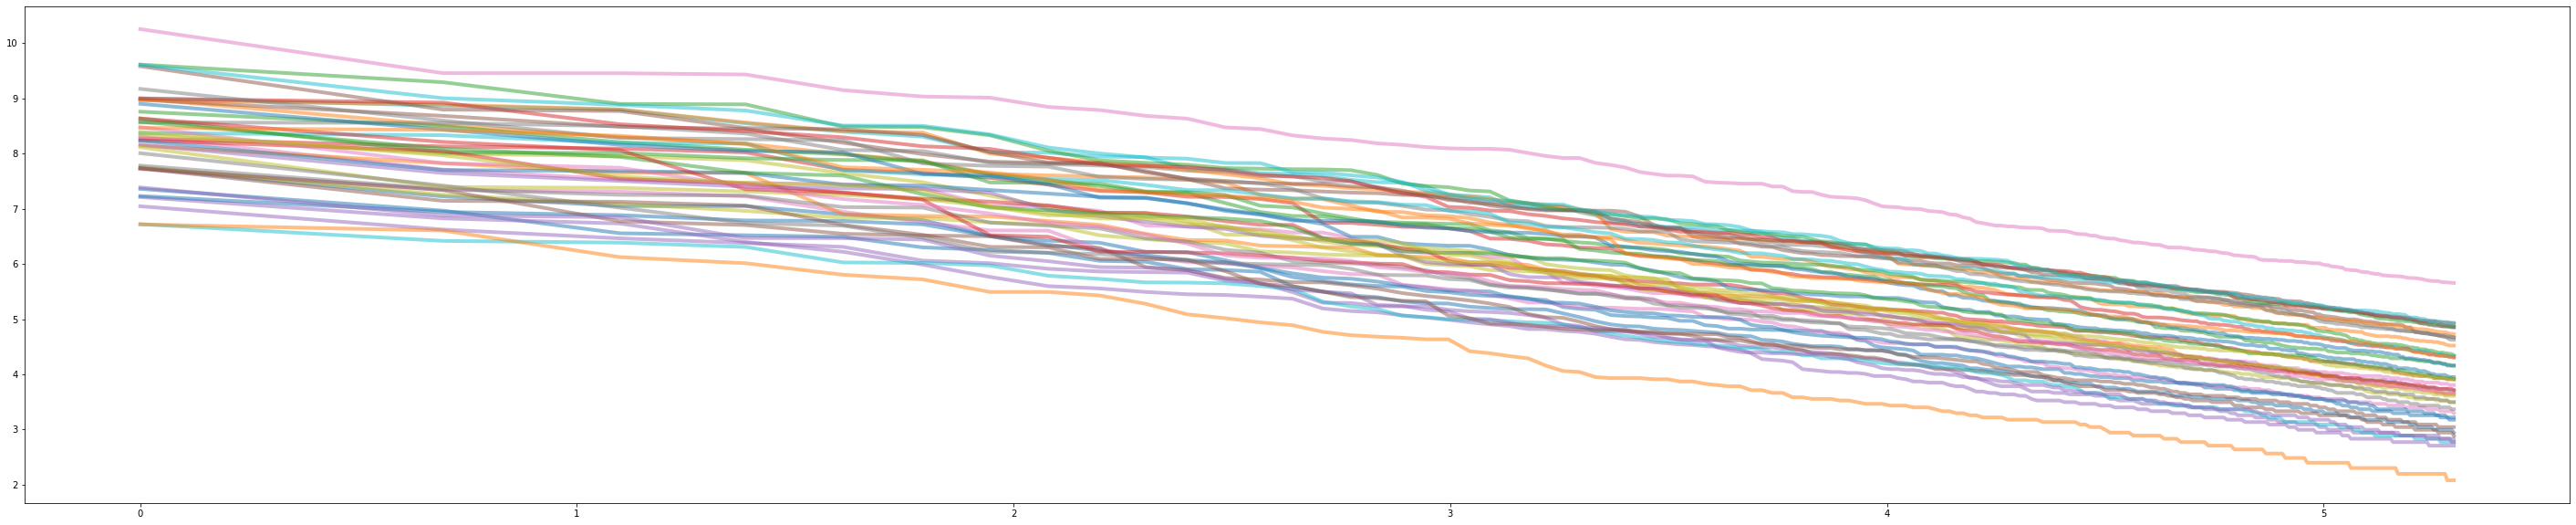

In [405]:
plt.rcParams["figure.figsize"] = [50, 10]
count = 0
for row in word_df.iterrows():
    if count != 0:
        #plt.scatter(word_df.loc[0,:], word_df.loc[count,:], alpha=.9, s=50)
        plt.plot(word_df.loc[0,:], word_df.loc[count,:], alpha=.5, linewidth='4')
    count = count + 1

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens


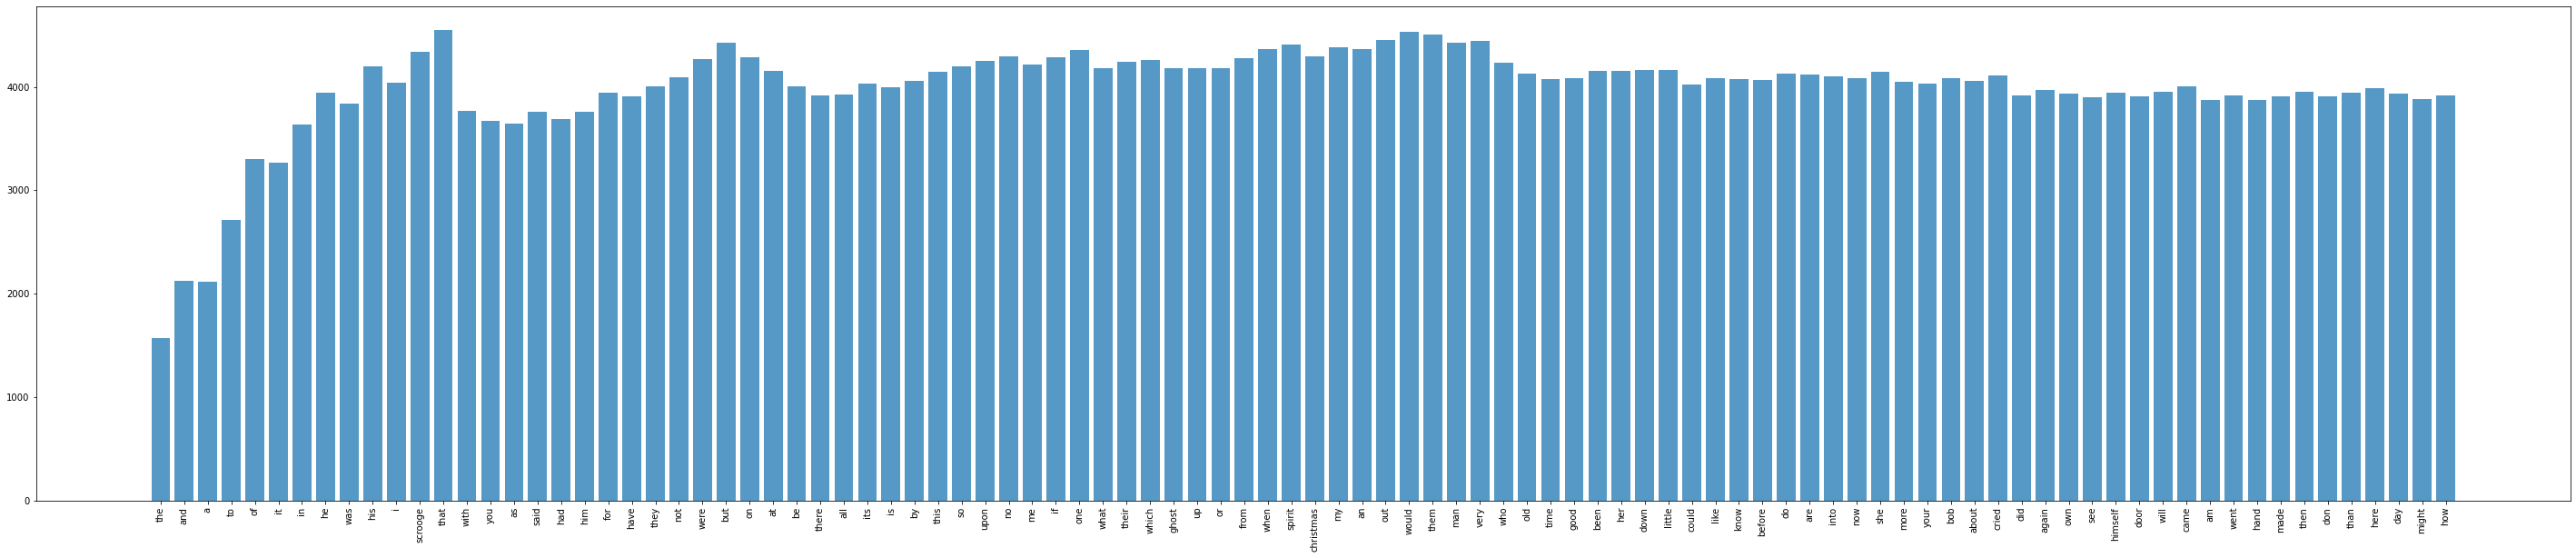

A Modest Proposal by Jonathan Swift


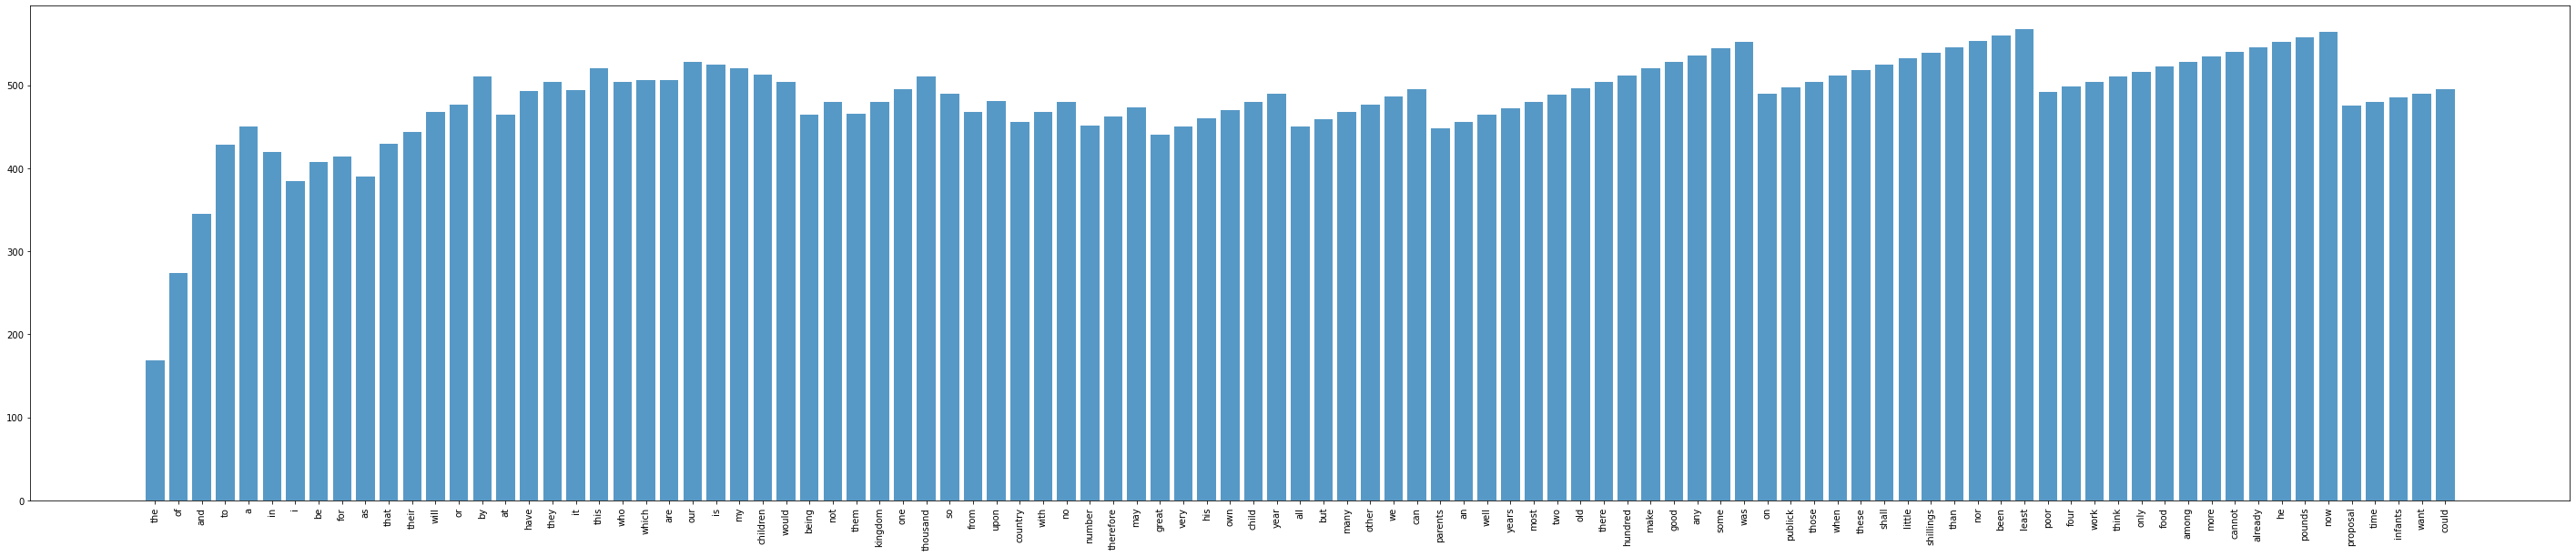

A Tale of Two Cities by Charles Dickens


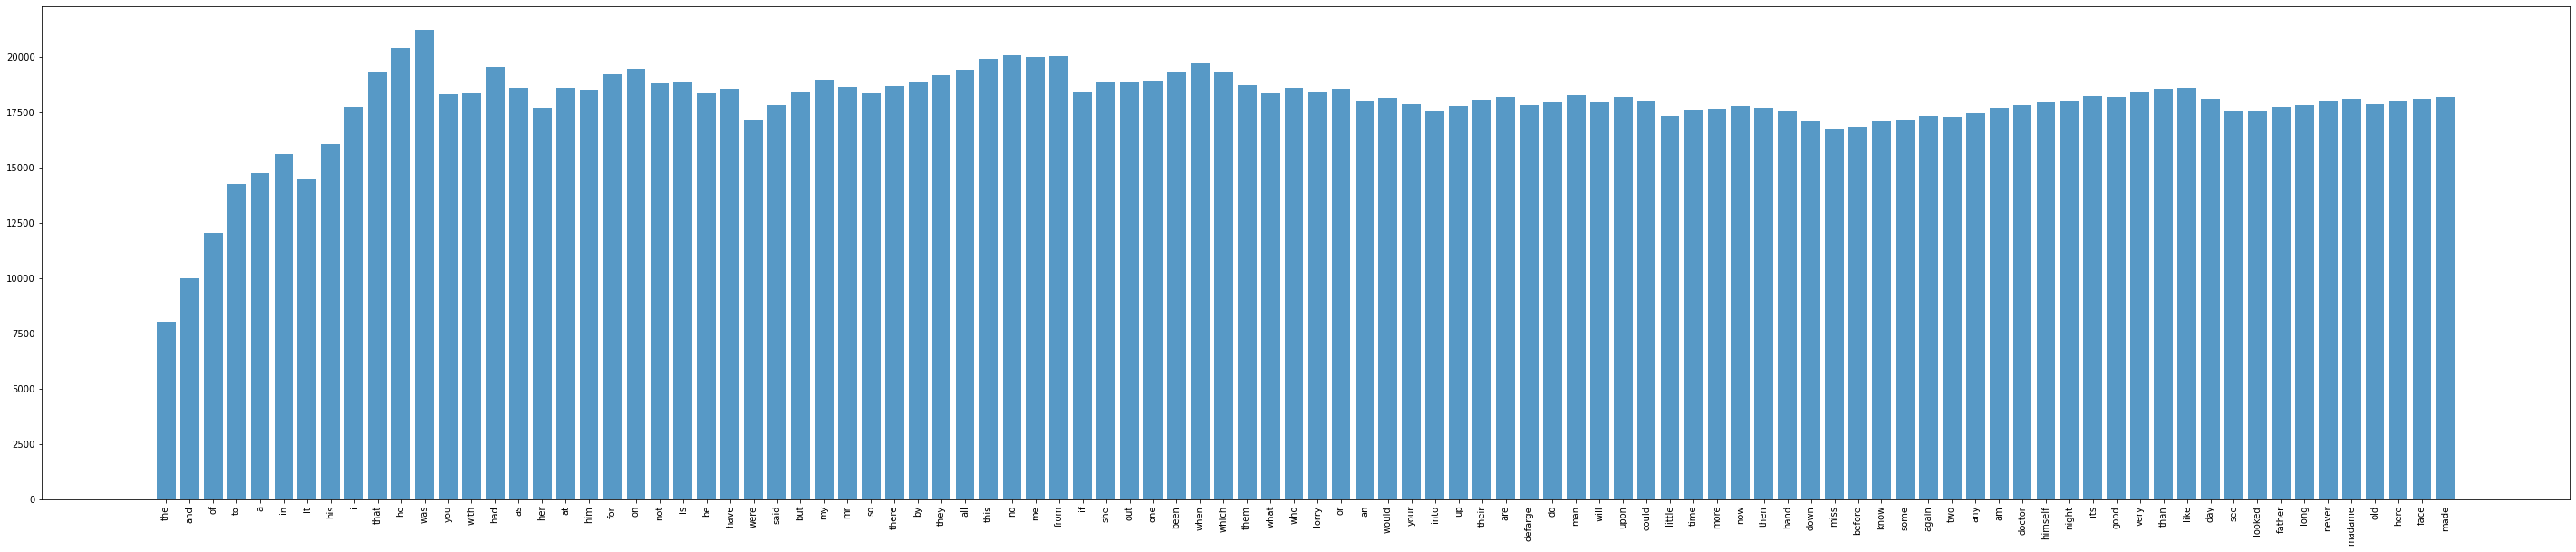

Adventures of Huckleberry Finn by Mark Twain


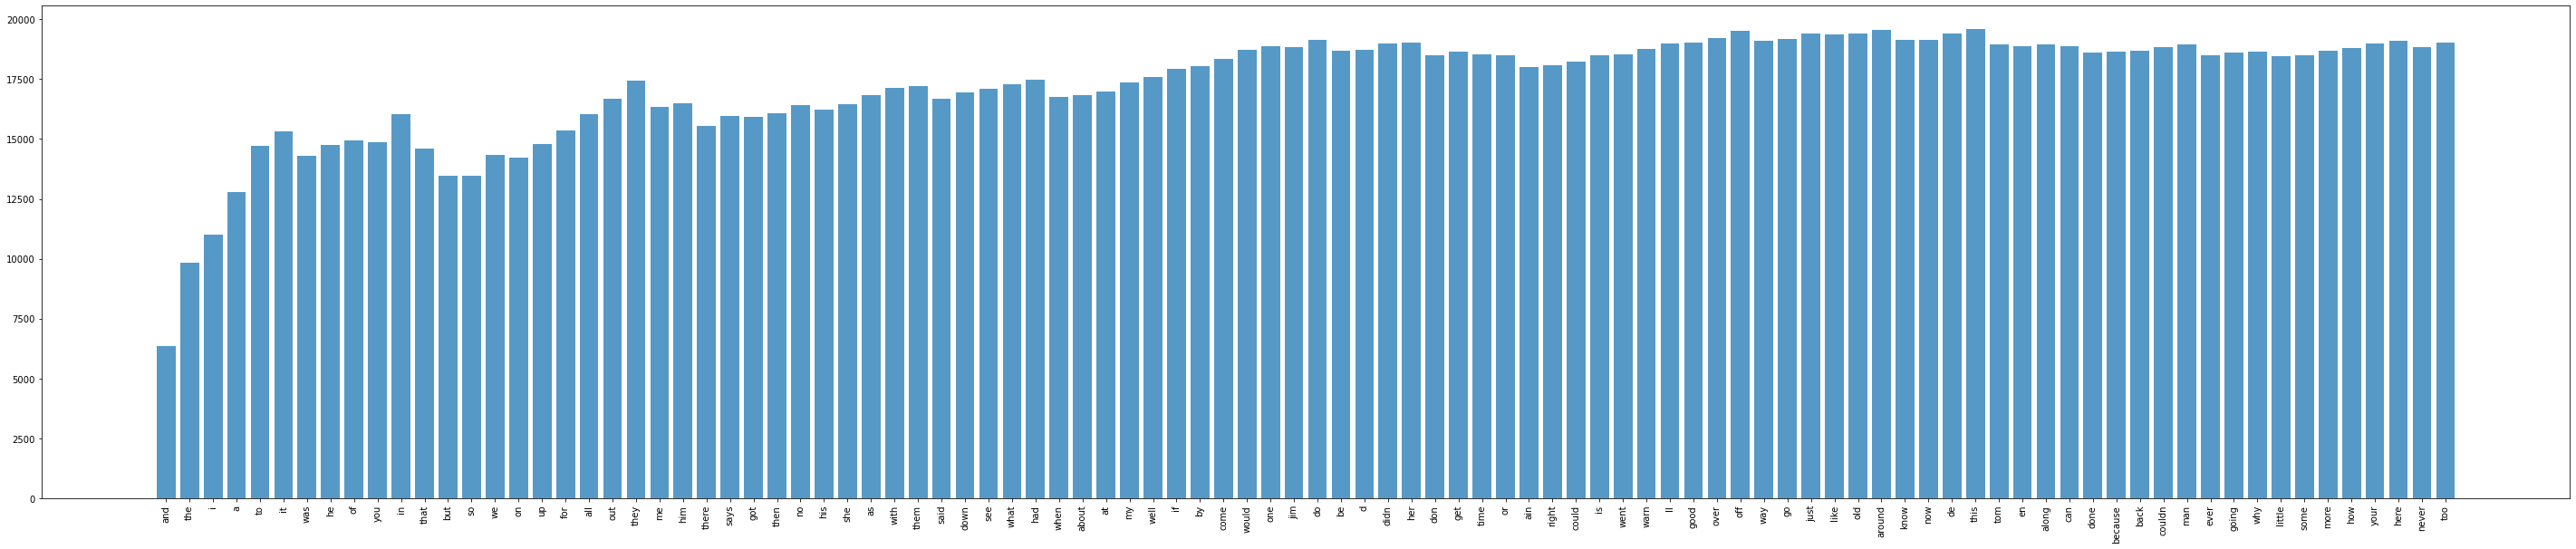

Anne of Green Gables by L. M.  Montgomery


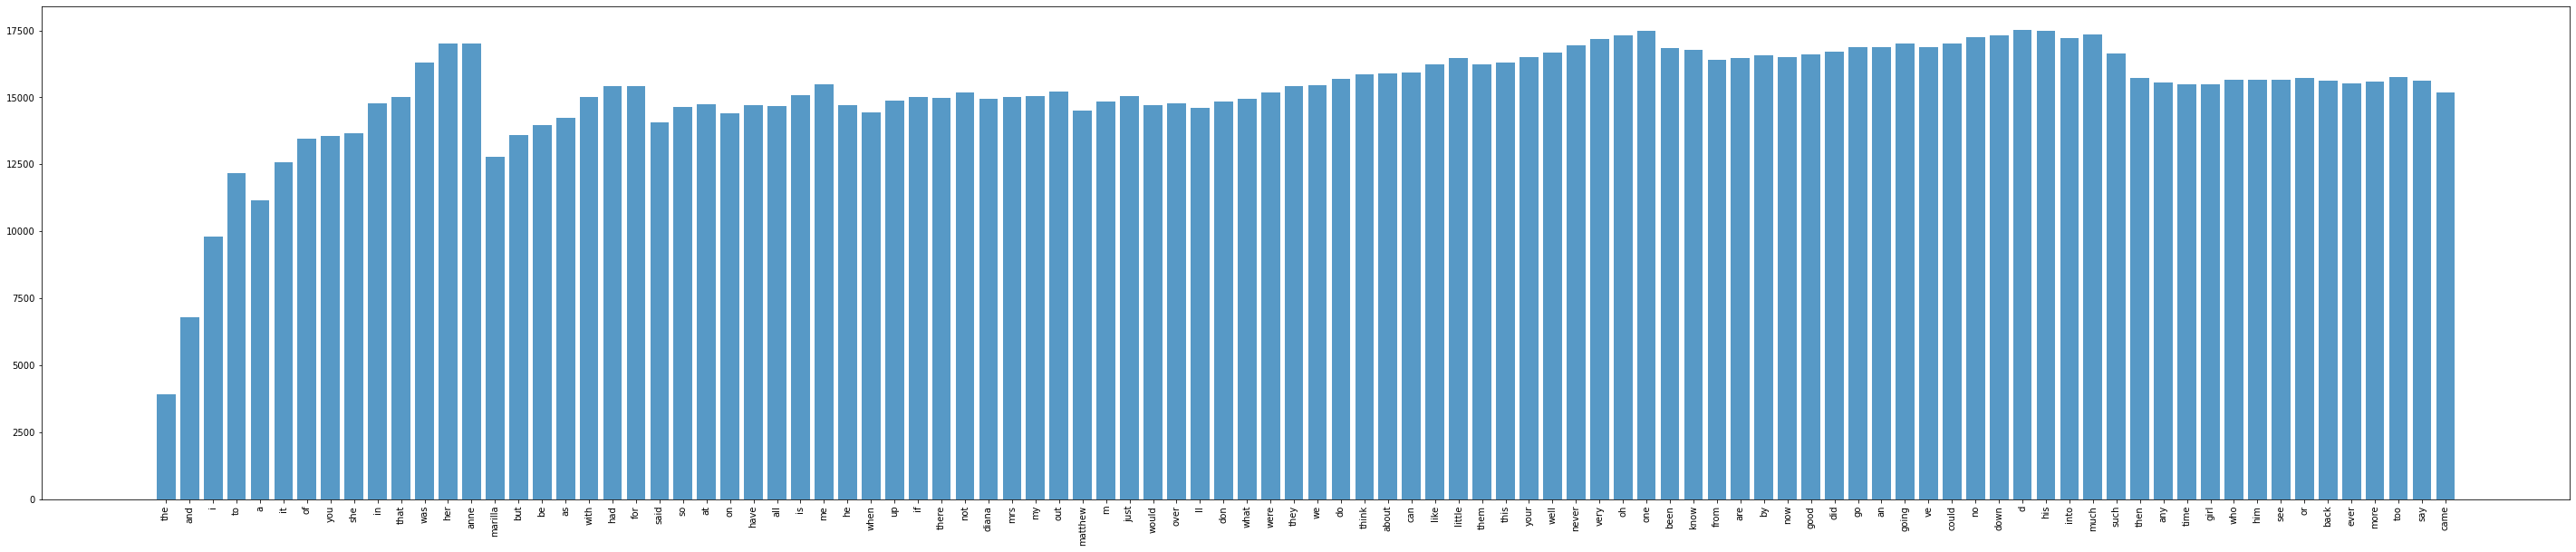

Anthem by Ayn Rand


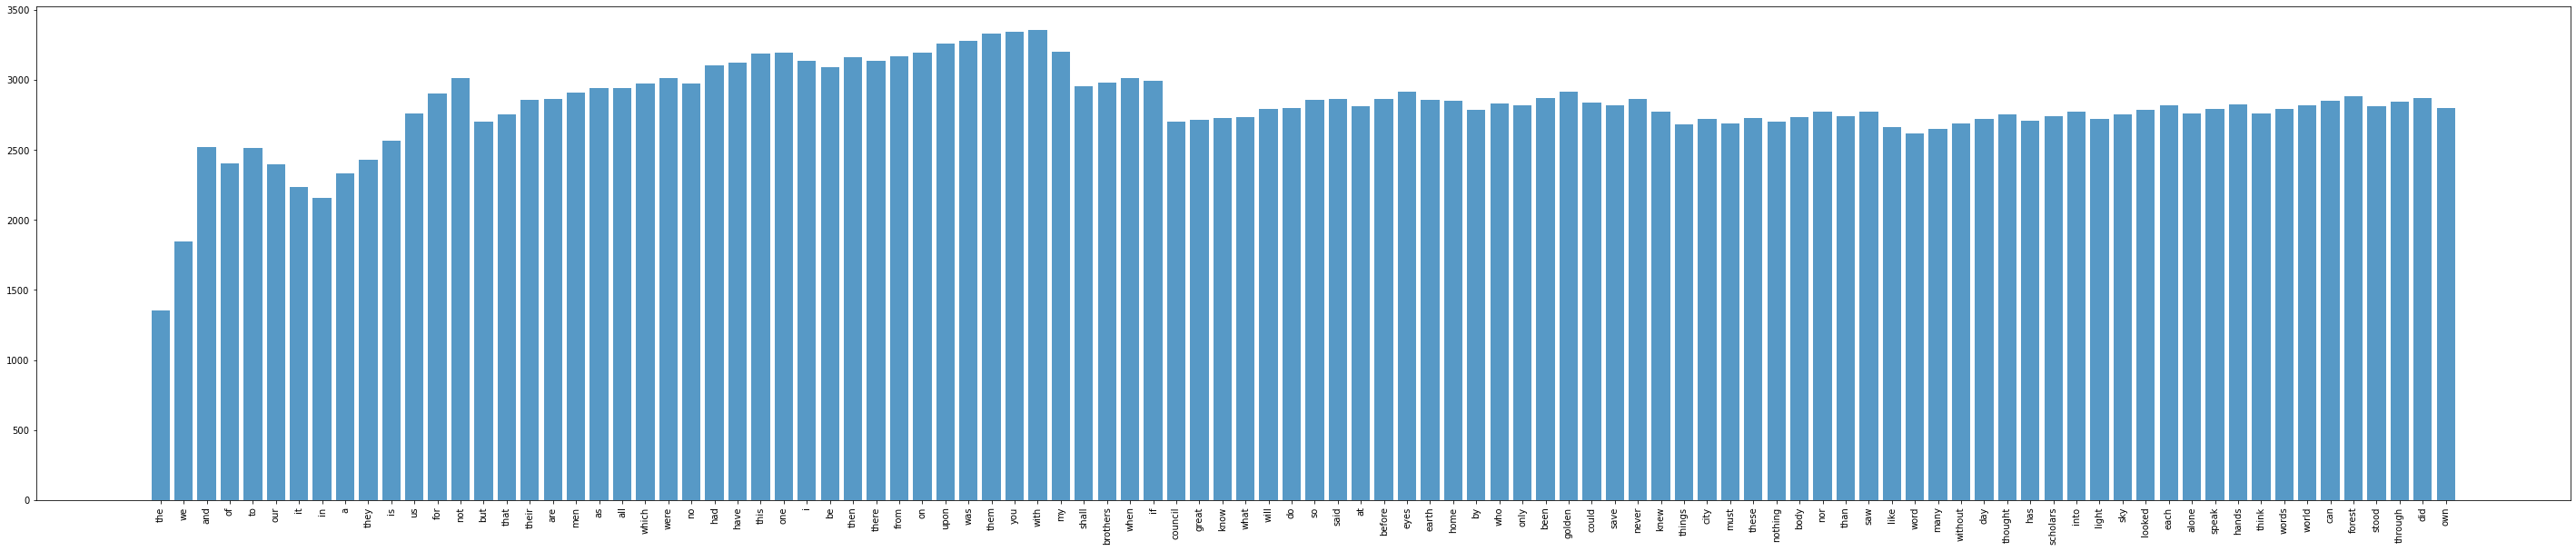

Dracula by Bram Stoker


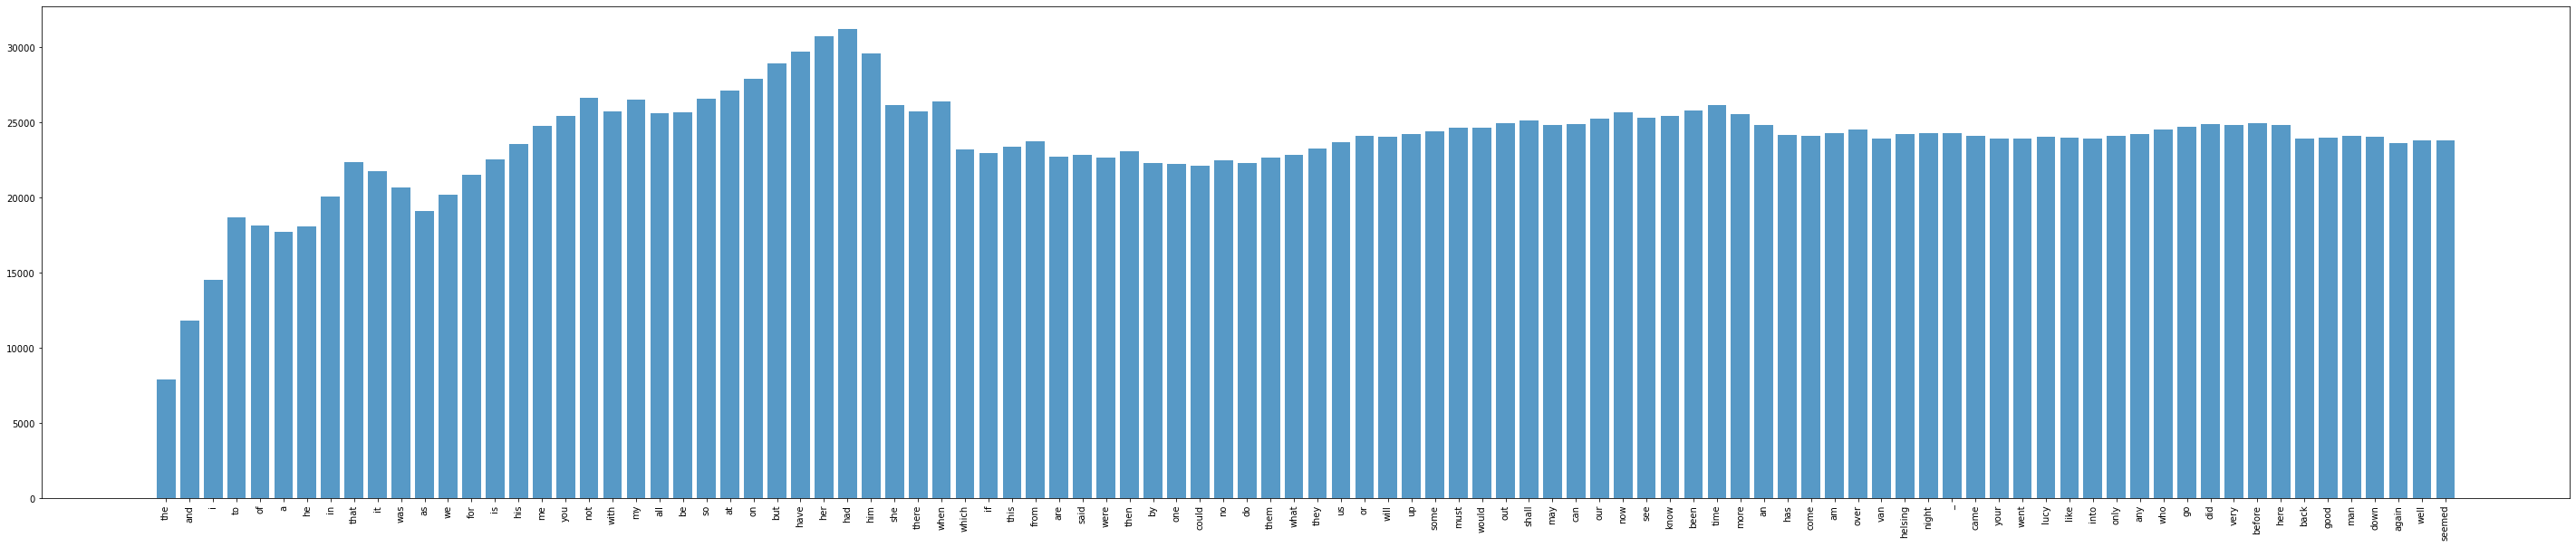

Dubliners by James Joyce


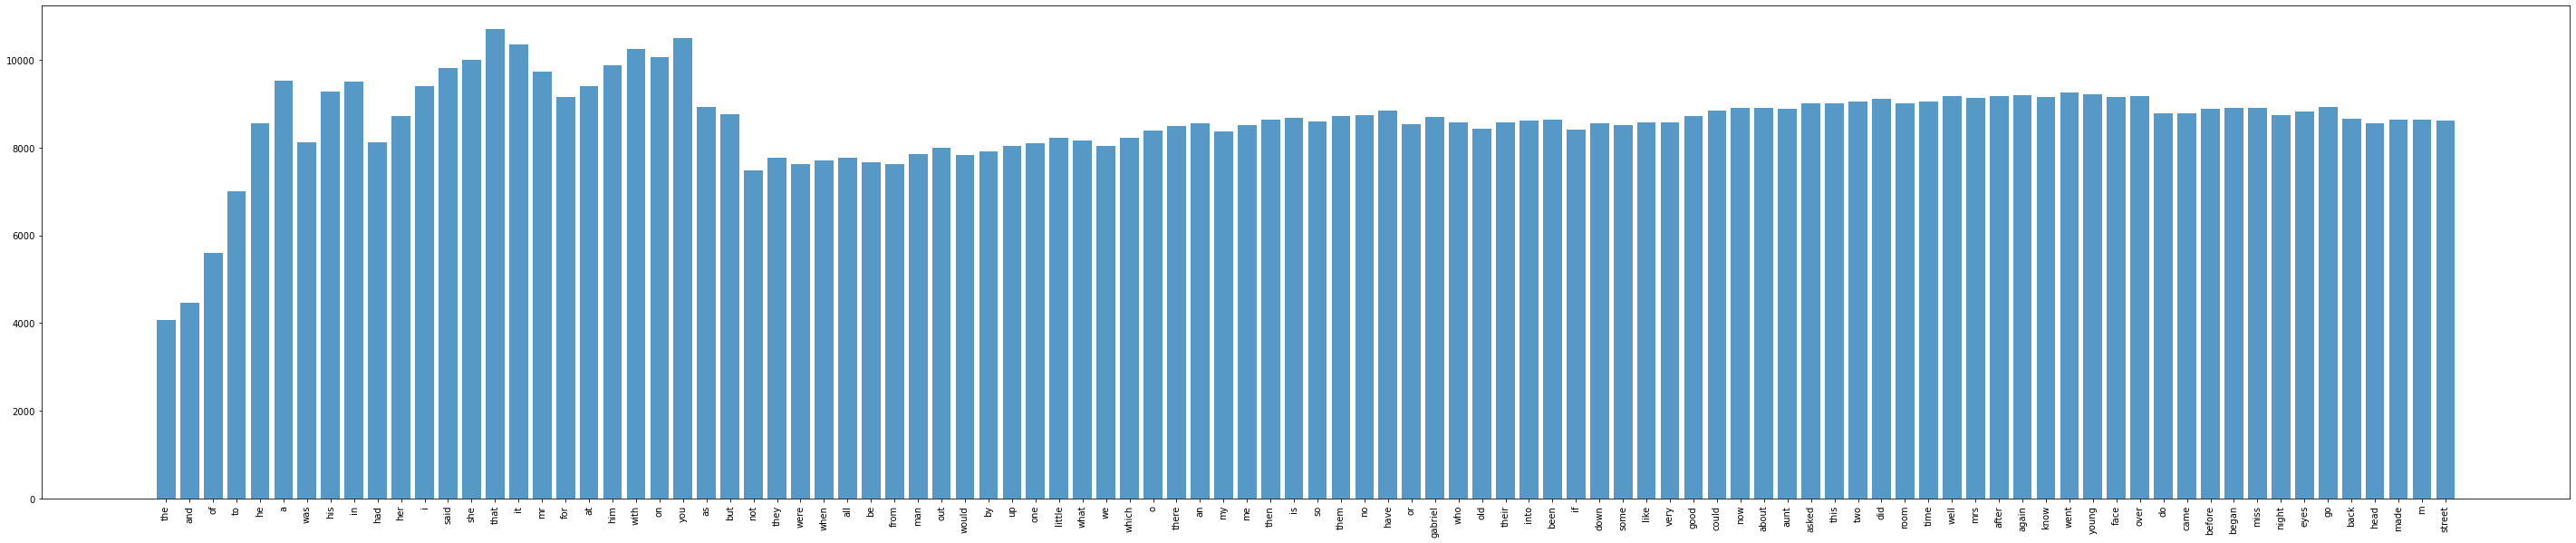

Emma by Jane Austen


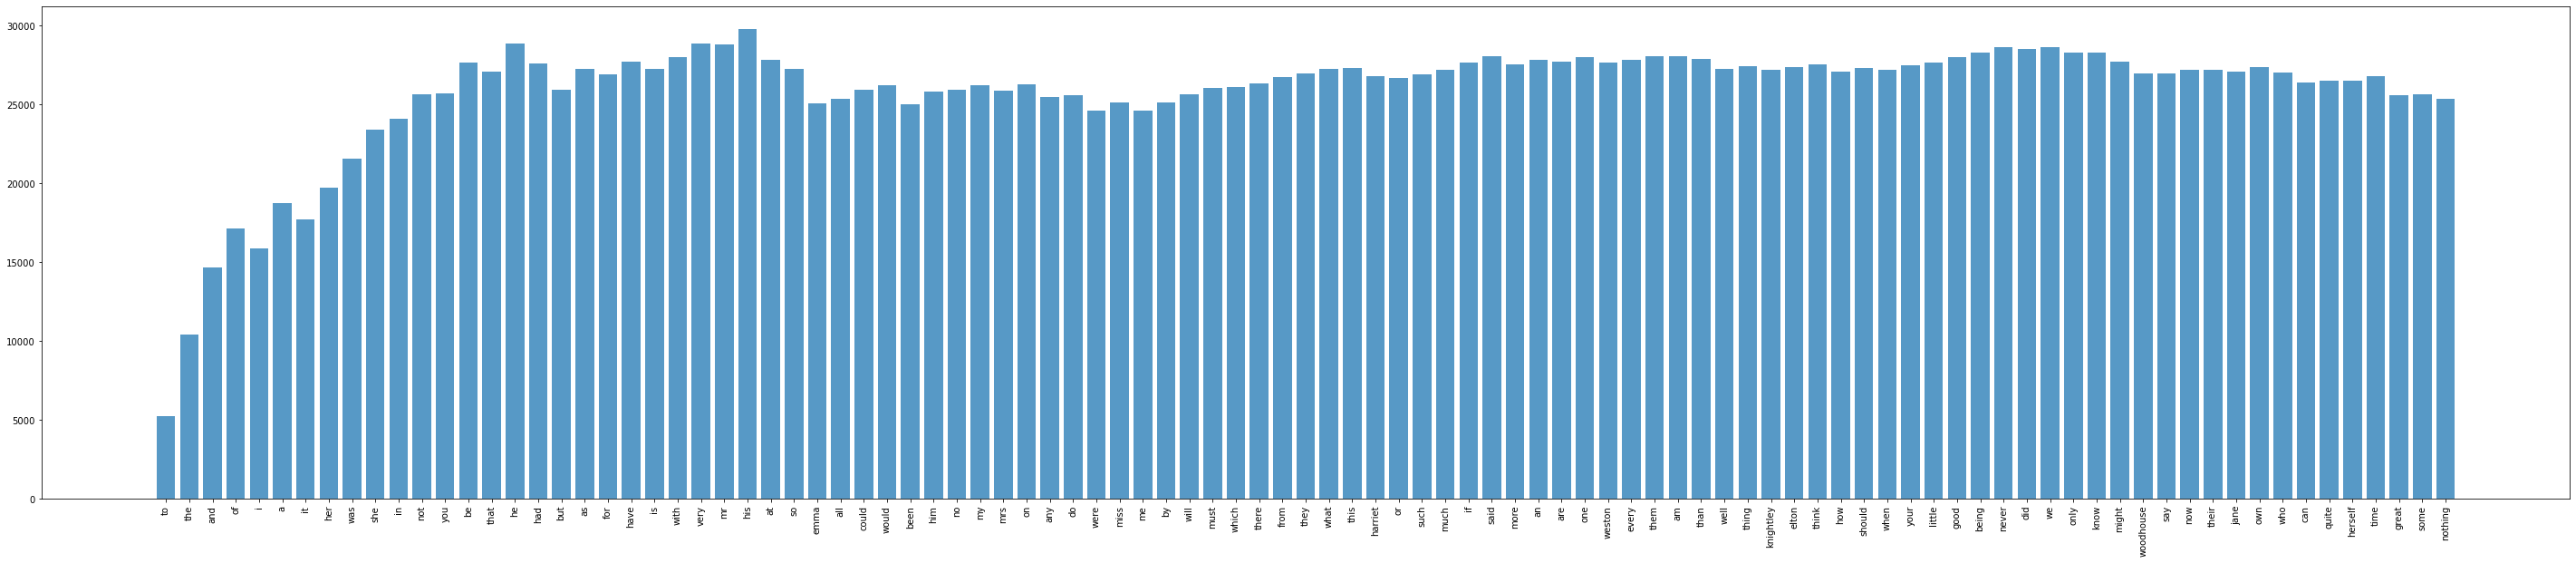

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley


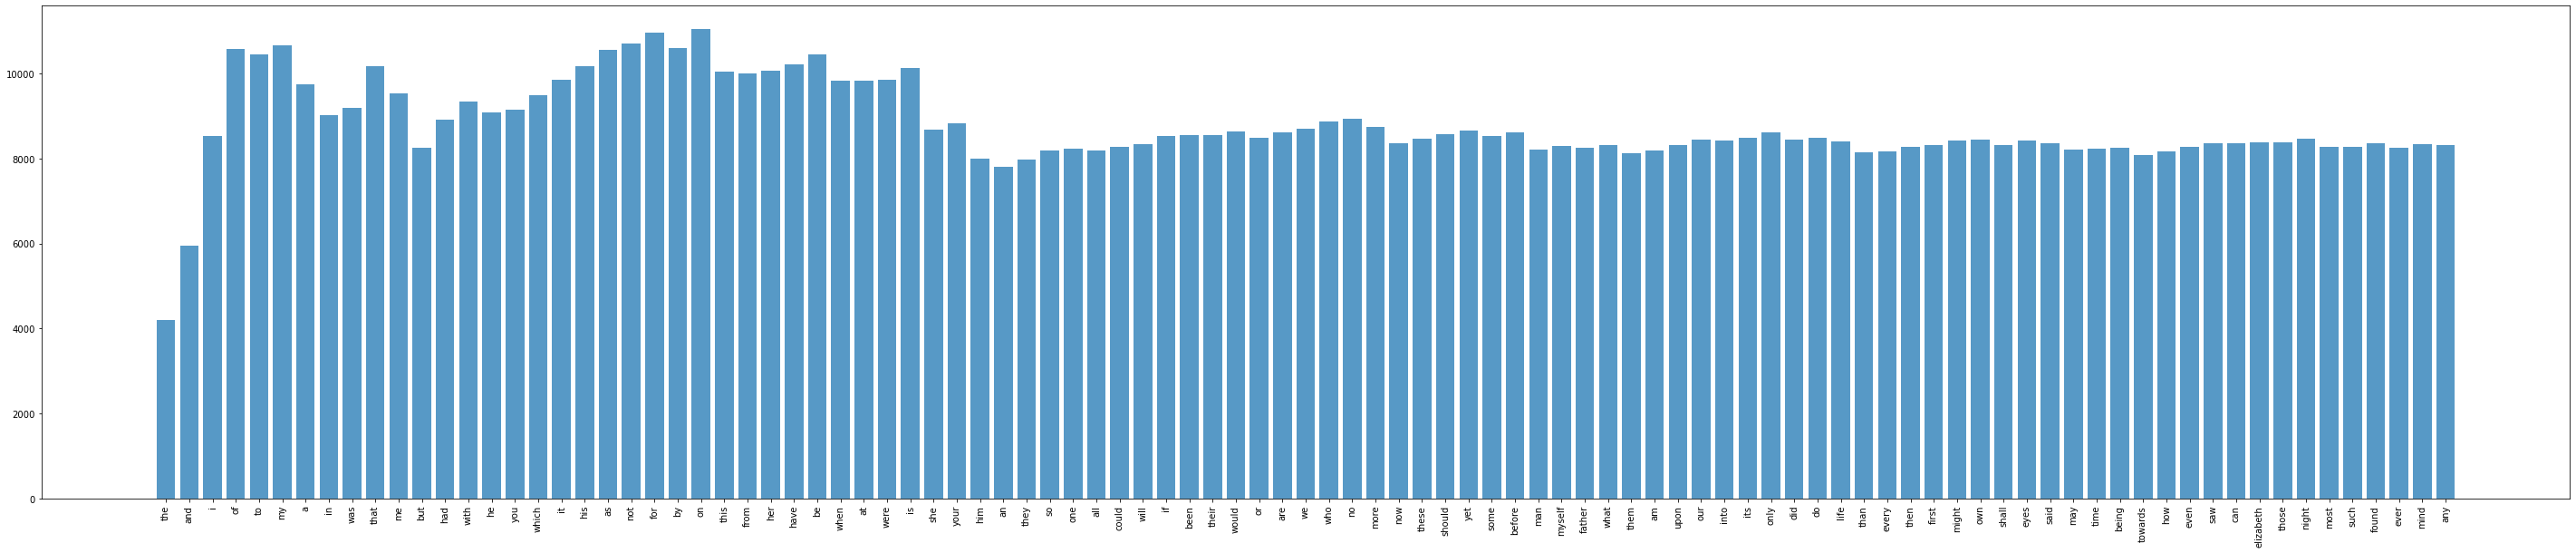

In [263]:
count = 0

for b in book_word_d:
    if count < 10:
        print(b)
        count = count + 1
        false_word = ['s','t','n']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_word_d[b], '\w+')]
        book_token_counter = Counter(book_token_words).most_common(100)
        for item in book_token_counter:
            if item[0] not in false_word:
                ind.append(item[0])
                fre.append(item[1])
                fretwo.append(item[1]*run)
                run = run + 1
        plt.bar(ind, fretwo, alpha =  .75)
        plt.xticks(rotation='vertical')
        plt.show()

In [ ]:
#words = Counter(book_r_counter.read().split()).most_common(10)
print(words)

In [ ]:
print(fre)

In [ ]:
print(book_r_counter)

In [153]:
for x in book_r_counter:
    print(x)

('the', 394701)
('and', 251180)
('of', 200453)
('to', 193529)
('a', 145177)
('i', 118866)
('in', 115758)
('he', 102809)
('that', 97177)
('it', 87001)
('was', 80659)
('his', 76135)
('you', 69208)
('with', 59688)
('for', 56137)
('is', 54939)
('as', 54727)
('not', 51171)
('had', 50623)
('her', 48714)
('but', 47999)
('at', 44906)
('s', 42300)
('him', 41997)
('on', 41988)
('be', 41307)
('she', 39169)
('have', 35562)
('all', 34712)
('my', 34314)
('by', 32147)
('me', 32146)
('they', 31310)
('said', 30215)
('this', 30048)
('which', 29939)
('so', 29148)
('from', 28542)
('one', 25697)
('what', 25056)
('there', 24421)
('or', 24362)
('were', 23358)
('are', 23094)
('no', 22976)
('we', 20987)
('if', 20902)
('when', 20570)
('them', 20510)
('who', 19886)


In [ ]:
book_r_counter['the']